# --- Day 13: A Maze of Twisty Little Cubicles ---

You arrive at the first floor of this new building to discover a much less welcoming environment than the shiny atrium of the last one. Instead, you are in a maze of twisty little cubicles, all alike.

Every location in this area is addressed by a pair of non-negative integers (x,y). Each such coordinate is either a wall or an open space. You can't move diagonally. The cube maze starts at 0,0 and seems to extend infinitely toward positive x and y; negative values are invalid, as they represent a location outside the building. You are in a small waiting area at 1,1.

While it seems chaotic, a nearby morale-boosting poster explains, the layout is actually quite logical. You can determine whether a given x,y coordinate will be a wall or an open space using a simple system:

- Find `x*x + 3*x + 2*x*y + y + y*y`.
- Add the office designer's favorite number (your puzzle input).
- Find the binary representation of that sum; count the number of bits that are 1.
    - If the number of bits that are 1 is even, it's an open space.
    - If the number of bits that are 1 is odd, it's a wall.

For example, if the office designer's favorite number were 10, drawing walls as # and open spaces as ., the corner of the building containing 0,0 would look like this:

```
  0123456789
0 .#.####.##
1 ..#..#...#
2 #....##...
3 ###.#.###.
4 .##..#..#.
5 ..##....#.
6 #...##.###
```

Now, suppose you wanted to reach 7,4. The shortest route you could take is marked as O:

```
  0123456789
0 .#.####.##
1 .O#..#...#
2 #OOO.##...
3 ###O#.###.
4 .##OO#OO#.
5 ..##OOO.#.
6 #...##.###
```

Thus, reaching 7,4 would take a minimum of 11 steps (starting from your current location, 1,1).

**What is the fewest number of steps required for you to reach 31,39?**

Your puzzle input is 1358.

---

First up, calculating whether a given position is open:

In [350]:
import numpy as np

def is_open(x,y, fav_num=1358):
    """returns true if open space, false if wall"""
    num = x*x + 3*x + 2*x*y + y + y*y + fav_num
    return f"{num:b}".count("1") % 2 == 0 and x>=0 and y>=0

is_open(0, 0, 10), is_open(1, 0, 10), is_open(2, 3, 10), is_open(2, 2, 10), is_open(-1,0,10), is_open(1,-1)

(True, False, False, True, False, False)

First up, lets make the grid as per the example just to make sure our code is correct. Notes:

- numpy grid addressing is backwards from the standard spreadsheet coordinates

In [351]:
def make_grid(x,y, fill='.', fav_num=1358):
    """returns a grid of size height y and width x filled with a default val"""
    grid = np.full((y, x), fill)
    for i in range(y):
        for j in range(x):
            if not is_open(j,i,fav_num):
                grid[i,j] = "#"
    return grid

test_grid = make_grid(10,7, fav_num=10)
print(test_grid.shape)
test_grid

(7, 10)


array([['.', '#', '.', '#', '#', '#', '#', '.', '#', '#'],
       ['.', '.', '#', '.', '.', '#', '.', '.', '.', '#'],
       ['#', '.', '.', '.', '.', '#', '#', '.', '.', '.'],
       ['#', '#', '#', '.', '#', '.', '#', '#', '#', '.'],
       ['.', '#', '#', '.', '.', '#', '.', '.', '#', '.'],
       ['.', '.', '#', '#', '.', '.', '.', '.', '#', '.'],
       ['#', '.', '.', '.', '#', '#', '.', '#', '#', '#']], dtype='<U1')

That looks to be the same as the example grid, so moving on.

Now to solve the maze. So we start at (1,1) and keep moving until we reach our goal.

In [ ]:
from collections import deque, defaultdict

def solve(start=(1,1), destination=(31,39)):
    """takes in a start state and returns first path which reaches destination"""
    moves=((0,-1), (0,1),(-1,0), (1,0)) # possible moves for a 4 way grid
    
    stack = deque() # the paths to process
    stack.append([start])

    paths = [] # tracking all possible valid paths
    
    path = stack.popleft()
    print("Starting at node", start, "searching for", destination)
    
    i = 0 # counter to be able to print out whats going on once in a while
    while path[-1] != destination:
        if not path in paths: 
            cur_x, cur_y = path[-1]
            for node in [(cur_x+i, cur_y+j) for i,j in moves]:
                new_x, new_y = node
                if is_open(new_x, new_y) and node not in path:
                    new_path = path[:]
                    new_path.append(node)
                    stack.append(new_path) # add all new unseen states to the stack
            paths.append(path) # have now processed this path
            
        try:
            path = stack.popleft()
        except:
            print(f"Error, the stack is empty at loop {i}")
            return paths
        
        i+=1
        if i % 10000 == 0:
            print(f"step {i:7,d}, looking at node {path[-1]} in a path of len {len(path)}")
    
    print("----"*12)
    print(f"It took {len(path)-1} steps from {start} node to the {destination} in a path of length {len(path)}")
    return path

path = solve()

Starting at node (1, 1) searching for (31, 39)
step  10,000, looking at node (32, 32) in a path of len 79
step  20,000, looking at node (30, 33) in a path of len 88
step  30,000, looking at node (35, 41) in a path of len 93


Now to viusalize the maze and path:

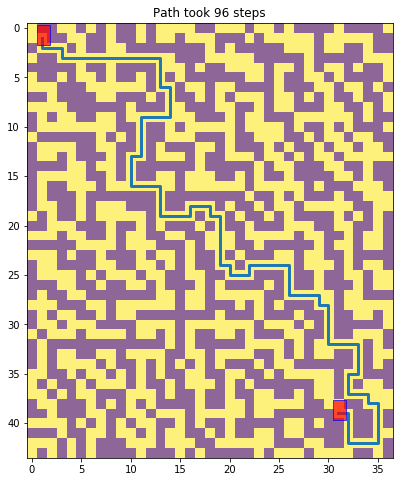

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(path):
    # setup the x and u points from the path
    x, y = zip(*path) # seperating x and y points

    # first up, plot the grid
    plt.figure(figsize=(12,8))

    binary_grid = [c == "." for c in [row for row in make_grid(max(x)+2,max(y)+2)]]
    plt.imshow(binary_grid, alpha=0.6)
    plt.axis('on')

    # now plot the path
    plt.title(f"Path took {len(path)-1} steps")
    plt.plot(x,y, linewidth=3, label="Path")
    
    #labelling the start and destination
    box_style = dict(fc="red", ec="b", lw=1, alpha=0.7, boxstyle="square,pad=0.5")
    x,y = path[0]
    plt.annotate(" ", xy=(x,y), bbox=box_style)
    x,y=path[-1]
    plt.annotate(" ", xy=(x,y), bbox=box_style)

    
    plt.show()

plot(path)

# --- Part Two ---

**How many locations (distinct x,y coordinates, including your starting location) can you reach in at most 50 steps?**

---

So, given i have upto 50 steps to take, what are all the possible locations I can visit? So I shold be able to modify the above func to store all paths where `steps <= 50`, implying a max path length of 51. 

In [367]:
def all_nodes_reachable(start=(1,1), steps=50):
    """takes in a start piont and a num of steps and returns all the nodes reachable"""
    moves=((0,-1), (0,1),(-1,0), (1,0))
    
    stack = deque()
    stack.append([start])

    paths = []
    
    nodes_visited = set()
    
    path = stack.popleft()
    nodes_visited.add(path[0])
    
    i = 0
    while len(path) < steps+1:
        
        if not path in paths:
            cur_x, cur_y = path[-1]
            for node in [(cur_x+i, cur_y+j) for i,j in moves]:
                new_x, new_y = node
                if is_open(new_x, new_y) and node not in path:
                    new_path = path[:]
                    new_path.append(node)
                    nodes_visited.add(node)
                    stack.append(new_path) # add all new unseen states to the stack
            paths.append(path) # have now processed this state
            
        try:
            path = stack.popleft()
        except:
            print("empty stack", i)
            return nodes_visited
        
        i+=1
            
        if i % 500 == 0:
            print(f"step {i:5,d}, looking at node {path[-1]} in a path of len {len(path)}")
    
    print("----"*13)
    print(f"Can visit {len(nodes_visited)} nodes from {start} node in {steps} steps")
    return nodes_visited, paths

nodes, paths = all_nodes_reachable()
len(nodes)

step   500, looking at node (15, 8) in a path of len 32
step 1,000, looking at node (15, 11) in a path of len 37
step 1,500, looking at node (20, 8) in a path of len 41
step 2,000, looking at node (8, 16) in a path of len 45
step 2,500, looking at node (4, 10) in a path of len 49
----------------------------------------------------
Can visit 141 nodes from (1, 1) node in 50 steps


141

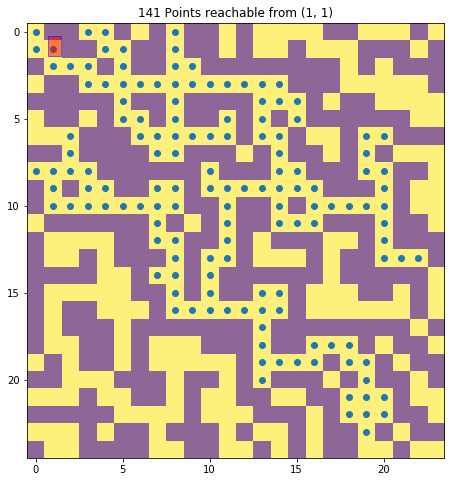

In [358]:
def plot_nodes(path, start=(1,1)):
    # setup the x and u points from the path
    x, y = zip(*path) # seperating x and y points

    # first up, plot the grid
    plt.figure(figsize=(12,8))

    binary_grid = [c == "." for c in [row for row in make_grid(max(x)+2,max(y)+2)]]
    plt.imshow(binary_grid, alpha=0.6)
    plt.axis('on')

    # now plot the nodes we can visit
    plt.title(f"{len(path)} Points reachable from {start}")
    plt.scatter(x,y)
    
    box_style = dict(fc="red", ec="b", lw=1, alpha=0.5, boxstyle="square,pad=0.5")
    x,y = start
    plt.annotate(" ", xy=(x,y), bbox=box_style)
    
    plt.show()

plot_nodes(nodes)